In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt



Amount of missing data in 'rad(m)' column for JAN: 79
Amount of missing data in 'rad(m)' column for JAN: 0
Amount of missing data in 'rad(m)' column for FEB: 95
Amount of missing data in 'rad(m)' column for FEB: 0
Amount of missing data in 'rad(m)' column for MAR: 21
Amount of missing data in 'rad(m)' column for MAR: 0
Amount of missing data in 'rad(m)' column for APR: 7
Amount of missing data in 'rad(m)' column for APR: 0
Amount of missing data in 'rad(m)' column for JUN: 1
Amount of missing data in 'rad(m)' column for JUN: 0
Amount of missing data in 'rad(m)' column for JUL: 1
Amount of missing data in 'rad(m)' column for JUL: 0
Amount of missing data in 'rad(m)' column for AUG: 20
Amount of missing data in 'rad(m)' column for AUG: 0
Amount of missing data in 'rad(m)' column for OCT: 9
Amount of missing data in 'rad(m)' column for OCT: 0
Amount of missing data in 'rad(m)' column for NOV: 16
Amount of missing data in 'rad(m)' column for NOV: 0
Amount of missing data in 'rad(m)' column

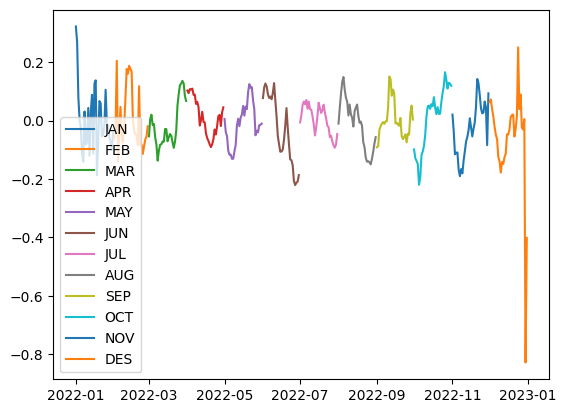

In [11]:
cwd = os.getcwd()

# listSheet = ['JAN']
listSheet = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DES']
listRadNorm = [4.87, 4.86, 4.87, 4.85, 4.9, 4.85,4.65,4.67, 4.7, 4.82,4.9, 4.96]
listDailyAverage = []

for sheet in listSheet:
    file_path = os.path.join(cwd, f"{sheet}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df = df.drop(columns=['prs(m)'])
        df['rad(m)'] = df['rad(m)'] - listRadNorm[listSheet.index(sheet)]
        if df['rad(m)'].isnull().any():
            missing_count = df['rad(m)'].isnull().sum()
            print(f"Amount of missing data in 'rad(m)' column for {sheet}: {missing_count}")
            df['rad(m)'] = df['rad(m)'].fillna(df['rad(m)'].mean())
            missing_count = df['rad(m)'].isnull().sum()
            print(f"Amount of missing data in 'rad(m)' column for {sheet}: {missing_count}")
        df['Time (UTC)'] = pd.to_datetime(df['Time (UTC)'], errors='coerce')
        df['Date'] = df['Time (UTC)'].dt.date
        daily_average = df.groupby('Date').mean().reset_index()
        listDailyAverage.append(daily_average)
        # Save the daily averages to a new CSV file
        
    else:
        print(f"File {sheet}.csv does not exist")

#export listDailyAverage into only one csv file
df = pd.concat(listDailyAverage)
df.to_csv('daily_average.csv', index=False)

#visualisasi
print(len(listDailyAverage))
fig, ax = plt.subplots()
for i in range(len(listDailyAverage)):
    ax.plot(listDailyAverage[i]['Date'], listDailyAverage[i]['rad(m)'], label=listSheet[i])
plt.legend()
plt.show()



In [12]:
# cwd = os.getcwd()

# listSheet = ['JAN']
# listSheet = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DES']
# listRadNorm = [4.87, 4.86, 4.87, 4.85, 4.9, 4.85,4.65,4.67, 4.7, 4.82,4.9, 4.96]
# daily_average = []


# for sheet in listSheet:
#     file_path = os.path.join(cwd, f"{sheet}.csv")
#     if os.path.exists(file_path):
#         df = pd.read_csv(file_path)
#         df = df.drop(columns=['prs(m)'])
#         df['rad(m)'] = df['rad(m)'] - listRadNorm[listSheet.index(sheet)]
#         if df['rad(m)'].isnull().any():
#             # missing_count = df['rad(m)'].isnull().sum()
#             # print(f"Amount of missing data in 'rad(m)' column for {sheet}: {missing_count}")
#             df = df.dropna(subset=['rad(m)'])
#             missing_count = df['rad(m)'].isnull().sum()
#         df['Time (UTC)'] = pd.to_datetime(df['Time (UTC)'], errors='coerce')
#         df['Date'] = df['Time (UTC)'].dt.date
#         # print(df.groupby('Date').mean())
#         daily_average.append(df.groupby('Date').mean())
#     else:
#         print(f"File {sheet}.xlsx does not exist")
        
#     # Export the monthly data to a new CSV file
#     print(f"{daily_average[listSheet.index(sheet)].head()}")
#     df = daily_average[listSheet.index(sheet)]
#     # print(df)
#     # output_file_path = os.path.join(cwd, f"{sheet}_processed.csv")
#     # df.to_csv(output_file_path, index=False)
#     # print(f"Exported processed data for {sheet} to {output_file_path}")

# #visualisasi
# fig, ax = plt.subplots()
# for i in range(len(daily_average)):
#     ax.plot(daily_average[i].index, daily_average[i]['rad(m)'], label=listSheet[i])
# ax.legend()
# plt.show()
